<h1>Data Science Project:Home Price Prediction in Bengalore</h1>
<b>Dataset Source</b>: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data <br>
<b>Model Used</b>:Regression Model


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat

<h3><b>Step 1</b> - Data Load: Load data from CSV file to dataframe</h3>

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df.shape

(13320, 9)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

<h4>Drop the columns which are not required for building a model</h4>

In [7]:
df1 = df.drop(['area_type', 'availability', 'society','balcony'], axis=1)
df1.shape

(13320, 5)

<h3><b>Step 2</b> - Data Cleaning: Handle NA values</h3>

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()

In [10]:
df2.shape

(13246, 5)

In [11]:
df2.isnull().sum()            #after removing NA values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

<h3><b>Step 3</b> - Feature Engineering</h3>

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<h4>1.1. Add new feature(integer) for BHK</h4>

In [13]:
df2['bhk'] = df2['size'].apply(lambda x:int(x.split(" ")[0]))

C:\Users\megha.naik\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


<h4>1.2. Analyse total_sqft(categorical feature)</h4>

In [15]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [16]:
df2[~(df2.total_sqft.apply(lambda x: is_float(x)))].head(10)  # Getting records where total_sqrt is not a float number

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


The above data set contains total_sqft in ranges such as 2100-2850 , we can take min/max/mean of those values. Some of the record has 34.46Sq. Meter, can do the unit conversion.

In [17]:
def convert_to_float(x):
    split_x = x.split("-")
    try:
        if len(split_x) ==2:
            return (float(split_x[0])+float(split_x[1]))/2
        return float(x)
    except:
        return None
        

In [18]:
df2['total_sqft'] = df2['total_sqft'].apply(lambda x : convert_to_float(x))

C:\Users\megha.naik\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df3 = df2.copy()
df3 = df3[df3.total_sqft.notnull()]
df3.shape

(13200, 6)

In [20]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


<h4>1.3 Remove 'size' column</h4>

In [21]:
df4 = df3.drop(['size'],axis=1)

In [22]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


<h3>Step 4 - Reducing no of 'location' (categorical feature) based on Dimensionality Reduction technique</h4>

In [23]:
df4.groupby('location').location.count().sort_values(ascending=False)

location
Whitefield                                      532
Sarjapur  Road                                  392
Electronic City                                 302
Kanakpura Road                                  264
Thanisandra                                     232
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               151
Hennur Road                                     150
7th Phase JP Nagar                              148
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
KR Puram                                         88
Hoo

In [24]:
reduced_location  = df4.groupby('location').location.count()

In [25]:
reduced_location_less_than_10 = reduced_location[reduced_location<=10]

In [26]:
reduced_location_less_than_10

location
 Anekal                                                1
 Banaswadi                                             1
 Basavangudi                                           1
 Bhoganhalli                                           1
 Devarabeesana Halli                                   6
 Electronic City                                       2
 Mysore Highway                                        4
 Rachenahalli                                          2
 Sector 1 HSR Layout                                   1
 Thanisandra                                           3
 Whitefield                                            1
 ittamadu                                              1
 south                                                 2
1 Annasandrapalya                                      1
1 Giri Nagar                                           1
1 Immadihalli                                          1
1 Ramamurthy Nagar                                     1
12th cross srinivas na

In [27]:
df4['location'] = df4.location.apply(lambda x : "Others" if x in reduced_location_less_than_10 else x)

In [28]:
df4.shape

(13200, 5)

In [29]:
df4.groupby('location').location.count().sort_values(ascending=False)

location
Others                       2887
Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
Thanisandra                   232
Yelahanka                     210
Uttarahalli                   186
Hebbal                        176
Marathahalli                  175
Raja Rajeshwari Nagar         171
Bannerghatta Road             151
Hennur Road                   150
7th Phase JP Nagar            148
Haralur Road                  141
Electronic City Phase II      131
Rajaji Nagar                  106
Chandapura                     98
Bellandur                      96
Hoodi                          88
KR Puram                       88
Electronics City Phase 1       87
Yeshwanthpur                   85
Begur Road                     84
Sarjapur                       80
Kasavanhalli                   79
Harlur                         79
Banashankari                   74
Hormavu                        74
Kenge

In [30]:
len(df4.location.unique())

241

In [31]:
df4.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Others,1020.0,6.0,370.00,6


<h3>Step 5 -Outlier Detection</h3>
<h4>normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft</h4>

In [32]:
df5 = df4[(df4.total_sqft/df4.bhk)>=300]
df5.shape

(12456, 5)

<h4>Create new feature price_per_sqft and analyse the data variation in the given data set</h4>

In [33]:
df5['price_per_sqft'] = df5['price']*100000/df5.total_sqft

df5.head()

C:\Users\megha.naik\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [34]:
pd.options.display.float_format = "{:.2f}".format
df5['price_per_sqft'].describe()

count    12456.00
mean      6308.50
std       4168.13
min        267.83
25%       4210.53
50%       5294.12
75%       6916.67
max     176470.59
Name: price_per_sqft, dtype: float64

<h4>Outlier removal using Standard deviation and mean</h4>
<p>Note :
    <ul>
        <li>
     <b>Standard Deviation</b> is the measure of how spread out the numbers are. <br>
           Formula: Square root of Variance<br></li>
        <li>
            <b>Variance</b> is Avg of sqaured diffrence from the mean<br>
            Formula:<br>
            1.Find the mean(Avg. of numbers)<br>
            2.Squared difference - subtract each number with mean and square the results<br>
            3.Avg of squared results</li></ul>
           </p>
                        

In [35]:
def remove_outliers_on_pps(df):
    out_df = pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        m = sub_df['price_per_sqft'].mean()
        s = sub_df['price_per_sqft'].std()
        reduced_df = sub_df[(sub_df['price_per_sqft'] > (m-s)) & (sub_df['price_per_sqft'] <= (m+s))]
        out_df = pd.concat([out_df,reduced_df],ignore_index=True)
    return out_df
df6 = remove_outliers_on_pps(df5)

In [36]:
df6.shape

(10295, 6)

<h4>Plot a graph to check how 2 bhk and 3 bhk data points are scattered</h4>

In [37]:
def plot_scatters(location,df):
    bhk_2 = df[(df.location == location) & (df.bhk == 2)]
    bhk_3 = df[(df.location == location) & (df.bhk == 3)]
    mat.rcParams['figure.figsize'] = (15,10)
    plt.title(location)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='blue',label="2 BHK")
    plt.scatter(bhk_3.total_sqft,bhk_3.price,marker='+',color='green',label="3 BHK")
    plt.legend()
    plt.show()

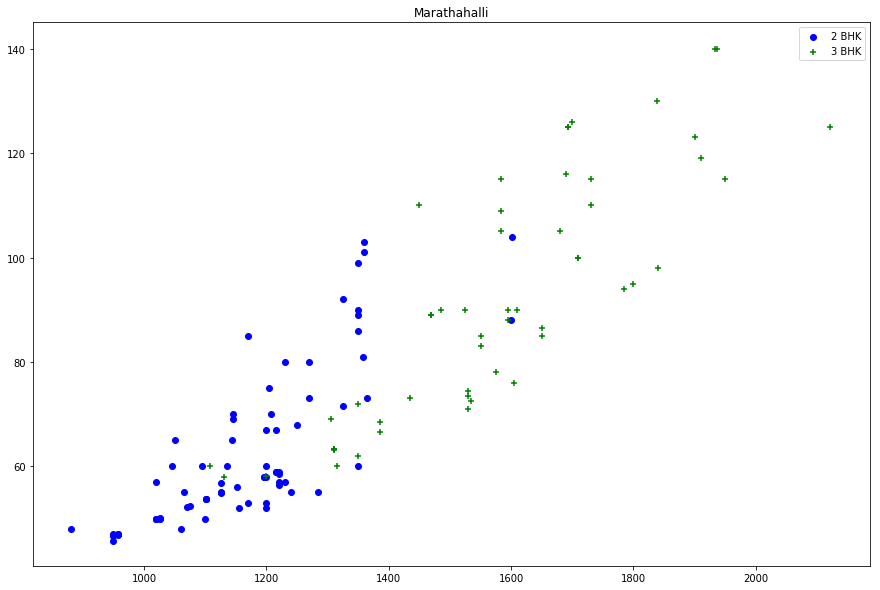

In [38]:
plot_scatters("Marathahalli",df6)

<h4>We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.</h4><br>

{<br>
    '1' : {<br>
        'mean': 4000,<br>
        'std: 2000,<br>
        'count': 34<br>
    },<br>
    '2' : {<br>
        'mean': 4300,<br>
        'std: 2300,<br>
        'count': 22<br>
    },    <br>
}<br>
<h4>Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment</h4>

In [39]:
def remove_outlier_bhk(df):
    exclude_list = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stat = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk]={
                'mean':bhk_df.price_per_sqft.mean(),
                'std':bhk_df.price_per_sqft.std(),
                'count':bhk_df.price_per_sqft.count()
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stat.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_list = np.append(exclude_list,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_list,axis='index')

In [40]:
df7 = remove_outlier_bhk(df6)

In [41]:
df7.shape

(7377, 6)

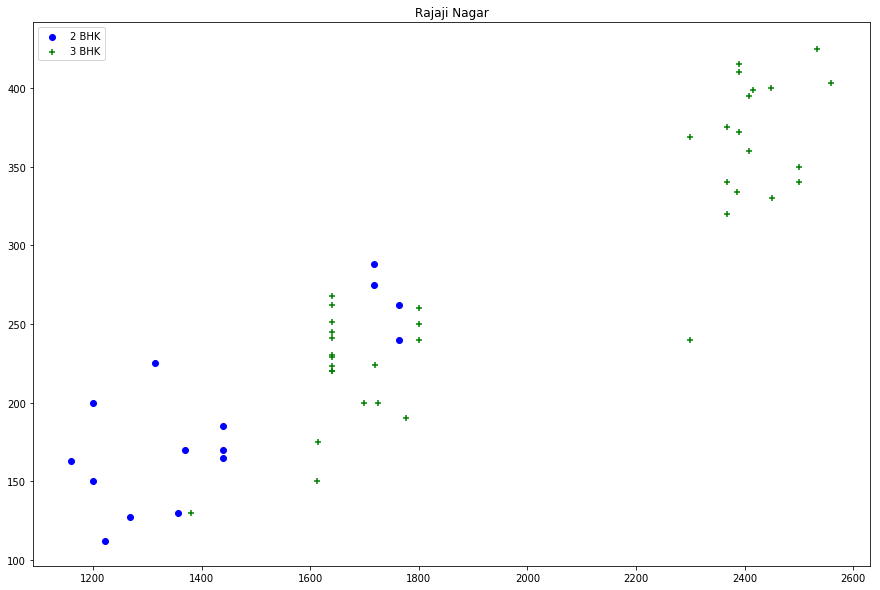

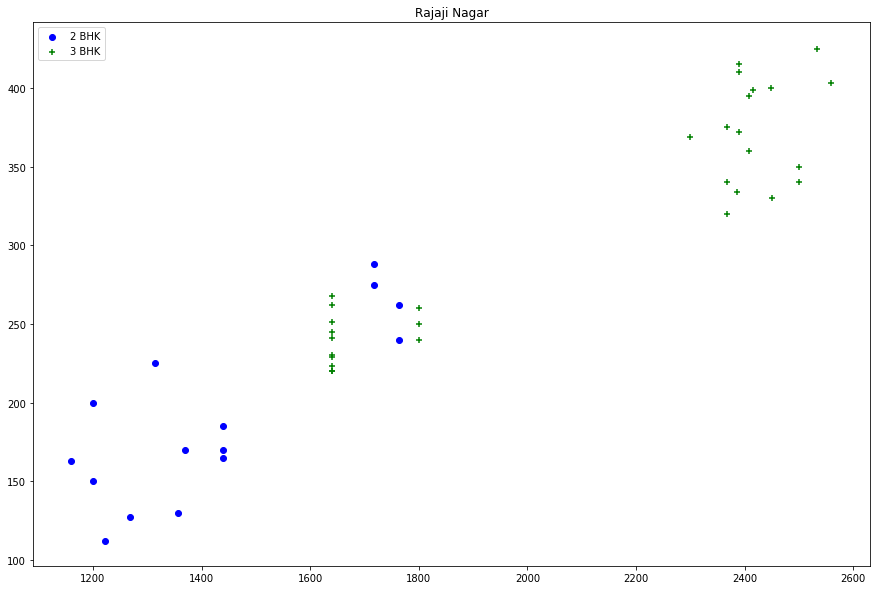

In [131]:
plot_scatters("Rajaji Nagar",df6)
plot_scatters("Rajaji Nagar",df7)

### Before and after removal of outliers :Rajaji Nagar

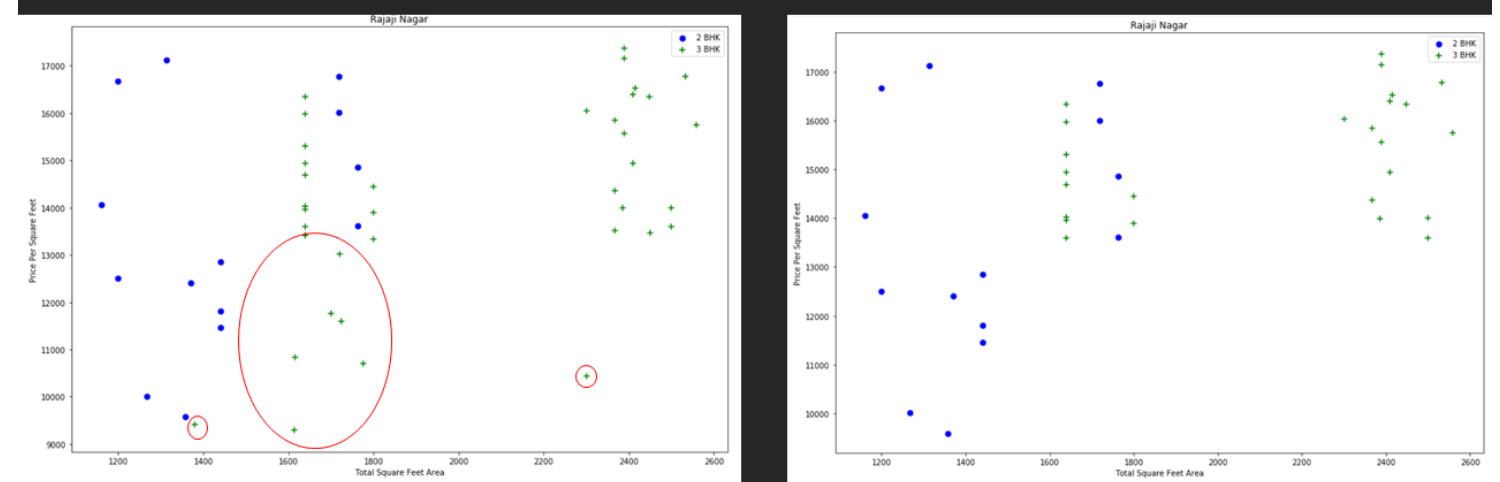

<function matplotlib.pyplot.show(*args, **kw)>

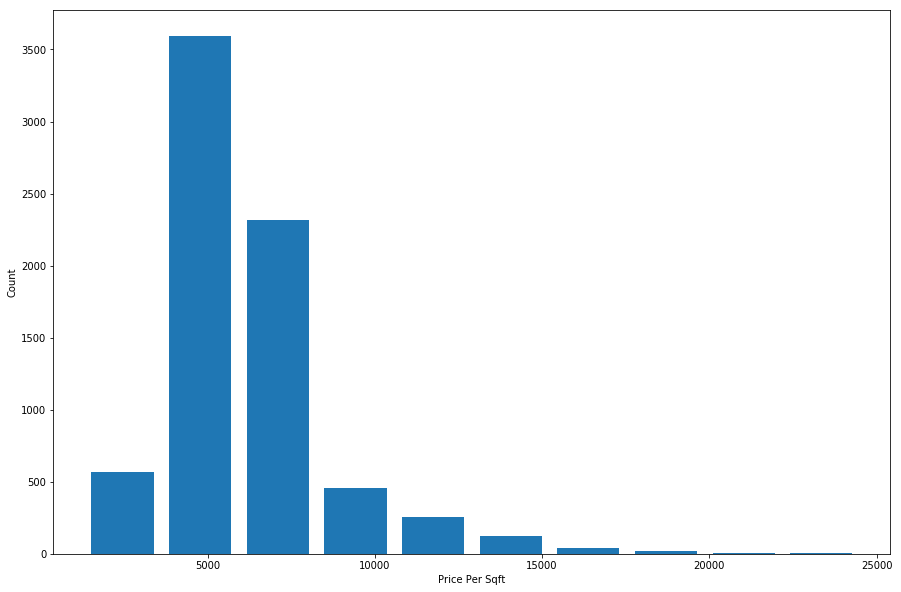

In [43]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
plt.show

In [44]:
 df8 = df7[df7.bath <(df7.bhk+2)]
 df8.shape

(7298, 6)

Removed records where Bath count is more than bhk 

In [45]:
df9 = df8.drop(['price_per_sqft'],axis=1)

In [46]:
df9.shape

(7298, 5)

In [47]:
df9.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.00,2.00,40.00,2
2,Devarachikkanahalli,1200.00,2.00,83.00,2
3,Devarachikkanahalli,1170.00,2.00,40.00,2
4,Devarachikkanahalli,1425.00,2.00,65.00,3
5,Devarachikkanahalli,947.00,2.00,43.00,2


<h3> Step 6: One hot encoding</h3>
<br>
Converting  categorical feature into numerical values

In [49]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df10 = pd.concat([df9,dummies.drop('Others',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.00,2.00,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.00,2.00,83.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.00,2.00,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.00,2.00,65.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.00,2.00,43.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.00,2.00,40.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.00,2.00,83.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 7 : Building a model

In [54]:
df11.shape

(7298, 244)

In [55]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.00,2.00,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.00,2.00,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.00,2.00,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df11.price
y.head(3)

1   40.00
2   83.00
3   40.00
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [69]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8430815553812547

## Step 8 : K fold validation to test the accuracy of the Regression Model

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84323985, 0.84763751, 0.87601792, 0.88761463, 0.85792941])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

## Step 9 : Finding the best model using Grid Search CV

In [61]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.86,{'normalize': False}
1,lasso,0.72,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.80,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Step 10 : Test the model with few properties

In [118]:
def predict_price(location,sqft,bhk,bath):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0 :
        x[loc_index] = 1
    return lr_clf.predict([x])[0]
    

In [119]:
predict_price("Vijayanagar",3,3,1300)
 

3923.7591373403893

In [120]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.28575128524824

In [121]:
predict_price('Indira Nagar',1000, 3, 3)

187.2437756938292

## Step 11:Export the tested model to pickle file

In [123]:
import pickle
with open("banglore_home_prices_model.pickle","wb") as f:
    pickle.dump(lr_clf,f)

<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [128]:
import json
columns={
    "data_columns":[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))